In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# importing modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [4]:
# reading the csv

In [5]:
os.chdir('C:/Users/Ayanava Debnath/OneDrive/Desktop/study/Datasets')
df = pd.read_csv('IMDB-Movie-Data.csv')

In [6]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
# getting overview of all columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [9]:
# checking the dimensions

In [10]:
df.shape

(1000, 12)

In [11]:
# separating categorical and continuous values

In [12]:
cat = list(df.columns[df.dtypes == 'object'])
cat

['Title', 'Genre', 'Description', 'Director', 'Actors']

In [13]:
con = list(df.columns[df.dtypes!='object'])
con

['Rank',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [14]:
# checking for missing values

In [15]:
s = df.isna().sum()
s

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

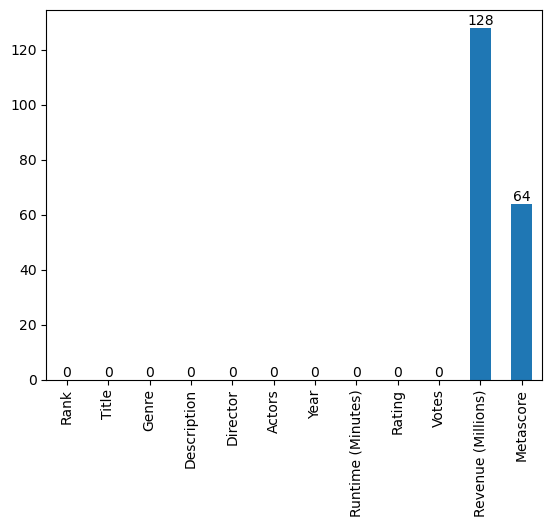

In [16]:
ax = s.plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

we can see that there are missing values in revenue and metascore column.        
let's drop them.

In [17]:
# dropping column with missing values 

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


In [20]:
df.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

so, now we can see there are no missing values in the dataframe .    

In [21]:
# checking duplicate values

In [22]:
df.duplicated().sum()

0

we can see there are no duplicate values in this dataframe.

In [23]:
#get overall statistics of the dataframe

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,838.0,485.247017,286.572065,1.0,238.2500,475.50,729.75,1000.00
Year,838.0,2012.507160,3.172360,2006.0,2010.0000,2013.00,2015.00,2016.00
Runtime (Minutes),838.0,114.638425,18.470922,66.0,101.0000,112.00,124.00,187.00
Rating,838.0,6.814320,0.877754,1.9,6.3000,6.90,7.50,9.00
Votes,838.0,193230.251790,193099.005104,178.0,61276.5000,136879.50,271083.00,1791916.00
Revenue (Millions),838.0,84.564558,104.520227,0.0,13.9675,48.15,116.80,936.63
Metascore,838.0,59.575179,16.952416,11.0,47.0000,60.00,72.00,100.00




1. the maximum rating for a movie is 9 , let's find out the movie name and it's director and revenue from the movie

In [25]:
df[df['Rating']== 9][['Title','Director','Revenue (Millions)']]

,Title,Director,Revenue (Millions)
54,The Dark Knight,Christopher Nolan,533.32


2. the maximum revenue is 936.63 ,let's find out the movie name and it's director and it's rating

In [26]:
df[df['Revenue (Millions)']== 936.63][['Title','Director','Rating']]

,Title,Director,Rating
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,8.1


### let's find out there's any relation between rating and revenue

<Axes: xlabel='Rating', ylabel='Count'>

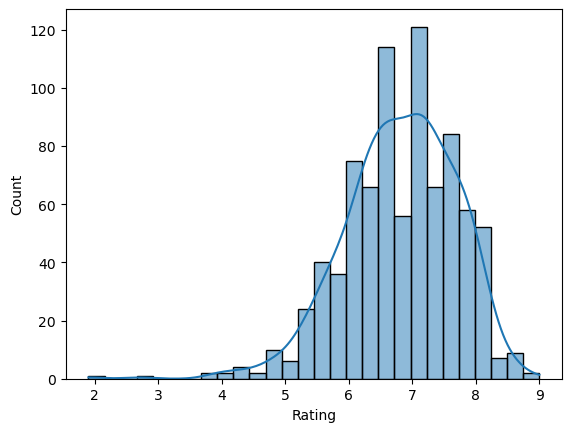

In [27]:
sns.histplot(data=df,x='Rating',kde=True)

we can see most of the movies ratings are between 6 to 8

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

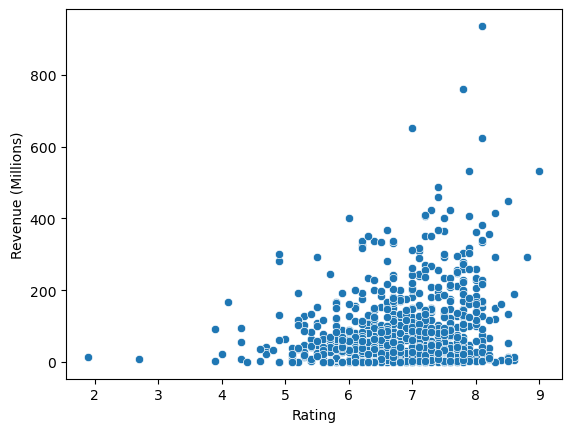

In [28]:
sns.scatterplot(x= 'Rating',y = 'Revenue (Millions)',data = df)

we can't possibly say if the rating is high , the movie will make more revenue     
but one thing we can see that the movies with (>400) revenue mostly have good ratings 

### let's check movies with >180 mins runtime and their title and rating

In [29]:
df[df['Runtime (Minutes)']>=180][['Title','Rating']]

,Title,Rating
82,The Wolf of Wall Street,8.2
88,The Hateful Eight,7.8
311,La vie d'Adèle,7.8


we can see from the statistics table the highest runtime for a movie is 187.00      
let's find out the title ,rating and the revenue the movie made

In [30]:
df[df['Runtime (Minutes)']== 187.0][['Title','Rating','Revenue (Millions)']]

,Title,Rating,Revenue (Millions)
88,The Hateful Eight,7.8,54.12


### let's find out if there's any relation between Runtime and Rating

<Axes: xlabel='Runtime (Minutes)', ylabel='Count'>

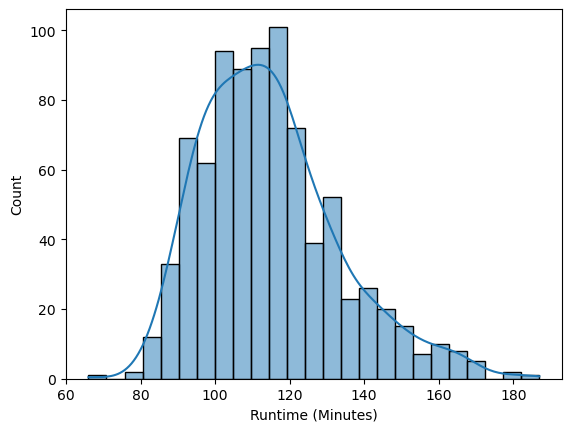

In [31]:
sns.histplot(data=df,x='Runtime (Minutes)',kde=True)

most movies have runtime of (90-125)mins

<Axes: xlabel='Rating', ylabel='Runtime (Minutes)'>

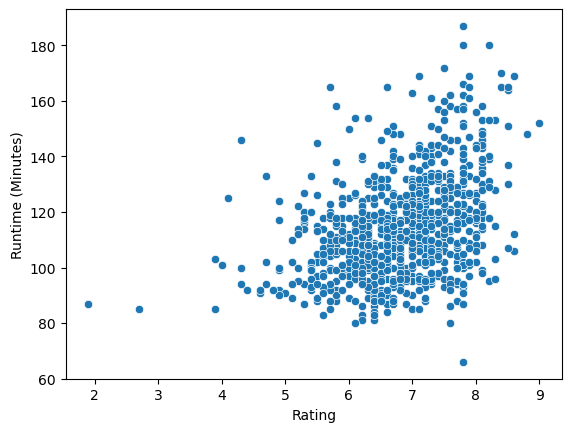

In [32]:
sns.scatterplot(x='Rating',y='Runtime (Minutes)',data=df)

we are not seeing any major relationship between Rating and Runtime

### In Which Year There Was The Highest Average Votes?

In [33]:
avgvy = df.groupby('Year')[['Votes']].mean().sort_values(by='Votes',ascending = False)
avgvy

,Votes
Year,
2012,290861.483871
2006,277232.219512
2009,267180.577778
2008,266580.145833
2007,266530.704545
2010,261082.929825
2011,259254.736842
2013,225531.892857
2014,211926.881720


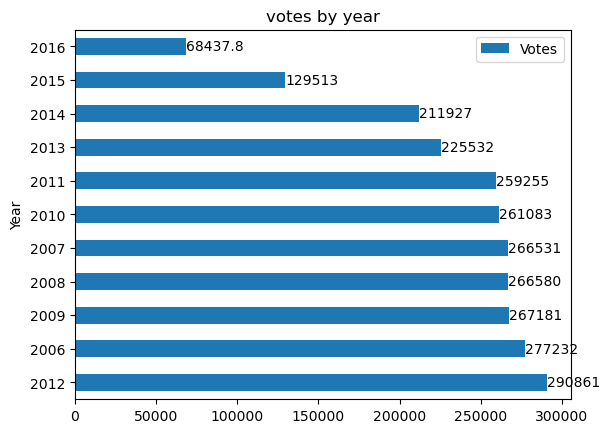

In [34]:
a=avgvy.plot(kind='barh')
plt.title('votes by year')
for i in a.containers:
    a.bar_label(i)


### In Which Year There Was The Highest Average Revenue?

In [38]:
avgr=df.groupby('Year')[['Revenue (Millions)']].mean().sort_values('Revenue (Millions)',ascending = False)
avgr

,Revenue (Millions)
Year,
2009,115.742000
2012,110.103065
2010,105.081579
2008,97.525417
2011,93.703333
2007,93.074091
2013,88.084643
2006,87.255610
2014,85.433656


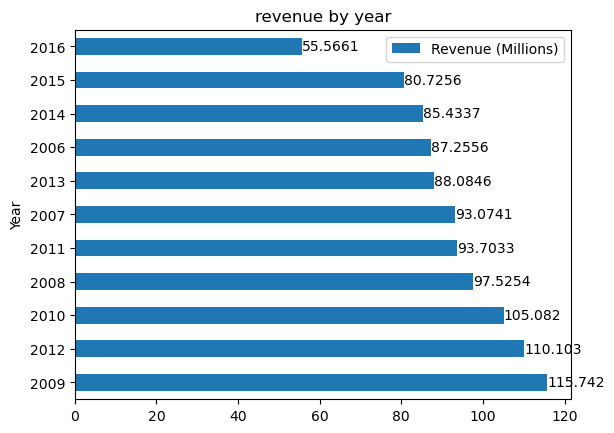

In [41]:
b=avgr.plot(kind='barh')
plt.title('revenue by year')
for i in b.containers:
    b.bar_label(i)


### find top 10 director with highest average revenue 

In [55]:
df.groupby('Director').mean()[['Revenue (Millions)']].sort_values(by='Revenue (Millions)',ascending = False).head(10)

,Revenue (Millions)
Director,
James Cameron,760.510
Colin Trevorrow,652.180
Joss Whedon,541.135
Lee Unkrich,414.980
Gary Ross,408.000
Chris Buck,400.740
Chris Renaud,368.310
Gareth Edwards,366.415
Tim Miller,363.020


James Cameron made most revenue 

### find out highest  Average Rating For top 10 director

In [57]:
df.groupby('Director').mean()[['Rating']].sort_values(by='Rating',ascending = False).head(10)

,Rating
Director,
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Florian Henckel von Donnersmarck,8.50
Aamir Khan,8.50
Damien Chazelle,8.40
Rajkumar Hirani,8.30
Thomas Vinterberg,8.30
Lee Unkrich,8.30


Christopher Nolan is the best director 

### find out top 10 movies with highest rating

In [78]:
hr = df.sort_values(by='Rating',ascending = False)[['Title','Rating']].head(10)
hr

,Title,Rating
54,The Dark Knight,9.0
80,Inception,8.8
36,Interstellar,8.6
249,The Intouchables,8.6
96,Kimi no na wa,8.6
124,The Dark Knight Rises,8.5
991,Taare Zameen Par,8.5
133,Whiplash,8.5
99,The Departed,8.5
476,The Lives of Others,8.5


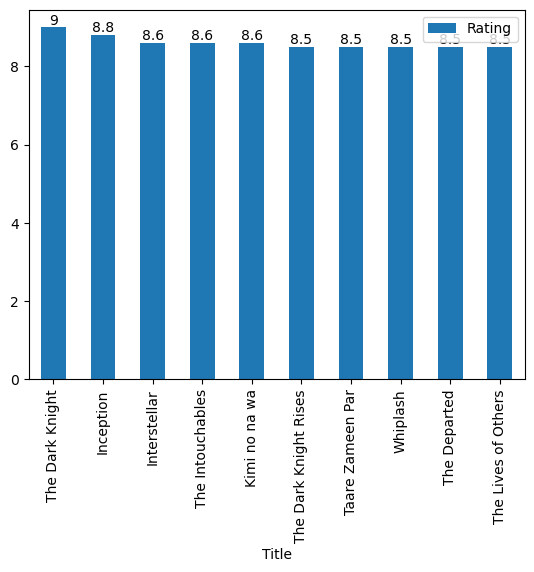

In [80]:
e = hr.set_index('Title').plot(kind='bar')
for i in e.containers:
    e.bar_label(i)

### find out top 10 movies with highest revenue

In [66]:
c = df.sort_values(by='Revenue (Millions)',ascending = False)[['Title','Revenue (Millions)']].head(10)
c

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


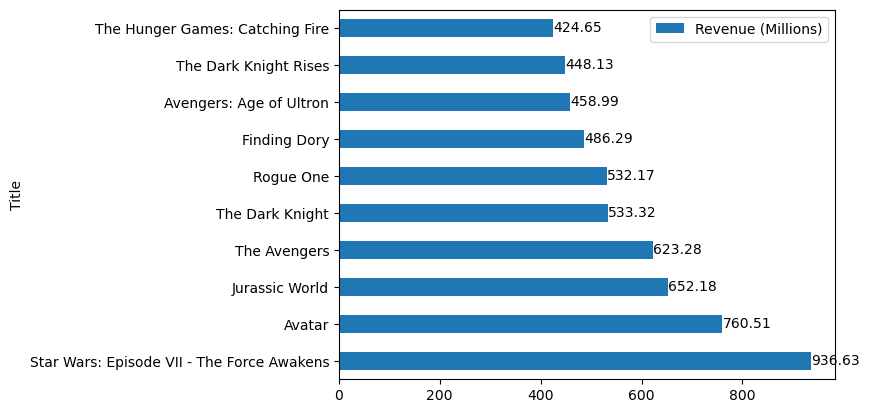

In [76]:
d= c.set_index('Title').plot(kind='barh')
for i in d.containers:
    d.bar_label(i)

### Number of movies per year 

In [86]:
mpr=df['Year'].value_counts()
mpr

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

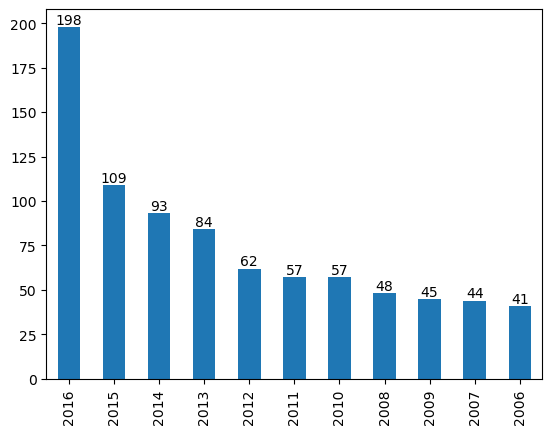

In [89]:
f=mpr.plot(kind='bar')
for i in f.containers:
    f.bar_label(i)

### Relationship between Revenue & famous movies

In [92]:
df.sort_values(by=['Rating','Metascore'],ascending=False)[['Title','Rating','Metascore','Revenue (Millions)']].head(10)

,Title,Rating,Metascore,Revenue (Millions)
54,The Dark Knight,9.0,82.0,533.32
80,Inception,8.8,74.0,292.57
96,Kimi no na wa,8.6,79.0,4.68
36,Interstellar,8.6,74.0,187.99
249,The Intouchables,8.6,57.0,13.18
476,The Lives of Others,8.5,89.0,11.28
133,Whiplash,8.5,88.0,13.09
99,The Departed,8.5,85.0,132.37
124,The Dark Knight Rises,8.5,78.0,448.13
64,The Prestige,8.5,66.0,53.08


by seeing the above data we can say that not necessarily famous movies will make more revenue

### Relationship between Runtime and Famous movies

In [96]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [157]:
df[['Metascore','Runtime (Minutes)']].corr()

,Metascore,Runtime (Minutes)
Metascore,1.000000,0.221397
Runtime (Minutes),0.221397,1.000000


<Axes: xlabel='Metascore', ylabel='Runtime (Minutes)'>

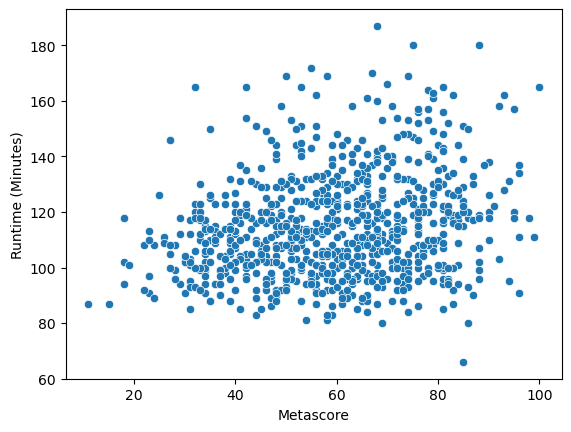

In [97]:
sns.scatterplot(data=df,x='Metascore',y='Runtime (Minutes)')

There is no relation between runtime and metascore(fame)

### Relationship between votes and rating

In [109]:
vr = df.sort_values(by='Votes',ascending = False)[['Title','Rating','Votes','Metascore','Revenue (Millions)']].head(10)
vr

,Title,Rating,Votes,Metascore,Revenue (Millions)
54,The Dark Knight,9.0,1791916,82.0,533.32
80,Inception,8.8,1583625,74.0,292.57
124,The Dark Knight Rises,8.5,1222645,78.0,448.13
36,Interstellar,8.6,1047747,74.0,187.99
76,The Avengers,8.1,1045588,69.0,623.28
144,Django Unchained,8.4,1039115,81.0,162.80
77,Inglourious Basterds,8.3,959065,69.0,120.52
99,The Departed,8.5,937414,85.0,132.37
87,Avatar,7.8,935408,83.0,760.51
64,The Prestige,8.5,913152,66.0,53.08


In [154]:
df[['Votes','Rating']].corr()

,Votes,Rating
Votes,1.000000,0.517452
Rating,0.517452,1.000000


<Axes: xlabel='Rating', ylabel='Votes'>

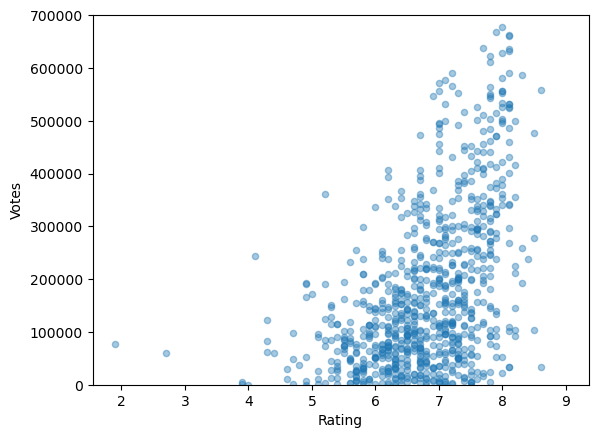

In [152]:
df.plot(kind="scatter",
                      x="Rating",
                      y="Votes",
                      
                      alpha=0.4,
                      ylim=(0,700000))

we can see 5 to 8 rating movies got most votes and when the rating is going up from 5 to 8 the 
votes have equally risen up

### Relationship between votes and Metascore

In [156]:
df[['Votes','Metascore']].corr()

,Votes,Metascore
Votes,1.000000,0.332674
Metascore,0.332674,1.000000


<Axes: xlabel='Votes', ylabel='Metascore'>

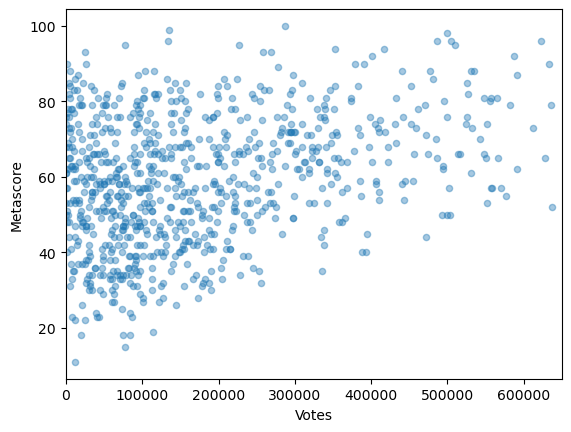

In [126]:
df.plot(kind='scatter',x='Votes',y='Metascore',alpha=0.4,
                      xlim=(0, 650000)
                      )

There are no major relationship between votes and fame(metascore)

# Conclusion

in the span of 2006 to 2016                                                      

1. Christopher Nolan is the best director 
2. James Cameron made the most revenue as a director
3. Not necessarily famous movies will make more revenue
4. Even though in year 2016 most movies were produced but highest revenue generated in year 2016
5. Most movies have runtime of (90-125)mins